## Лабораторна робота № 3 Аналіз складності алгоритмів. Алгоритми сортування.
## Мета. засвоїти аналіз складності алгоритмів як технологію на прикладі алгоритмів сортування методами включення та обміну.
### Виконав: Яцентюк Євгеній, група: КІ-24-1 

**[GitHub](https://github.com/kefir4ikk)**

### Теоретичні розрахунки складності

**Сортування вставлянням (Insertion Sort):**
* **Найгірший випадок:** $O(n^2)$. Відбувається, коли масив відсортований у зворотному порядку.
* **Найкращий випадок:** $O(n)$. Відбувається, коли масив вже відсортований (тільки порівняння, без переміщень).
* **Середній випадок:** $O(n^2)$.

**Сортування бульбашкою (Bubble Sort):**
* **Найгірший випадок:** $O(n^2)$. Масив відсортований у зворотному порядку.
* **Найкращий випадок:** $O(n)$ (при реалізації з прапорцем `swapped`, якщо масив вже відсортований). Без оптимізації — $O(n^2)$.
* **Середній випадок:** $O(n^2)$.

In [3]:
import time
import random
import matplotlib.pyplot as plt

# Щоб графіки малювались одразу в ноутбуці
%matplotlib inline

# Сортування вставлянням (Insertion Sort)
def insertion_sort(nums):
    nums = nums[:] # Робимо копію, щоб не псувати оригінал
    for j in range(1, len(nums)):
        key = nums[j]
        i = j - 1
        while i >= 0 and nums[i] > key:
            nums[i + 1] = nums[i]
            i -= 1
        nums[i + 1] = key
    return nums

# Сортування бульбашкою (Bubble Sort)
def bubble_sort(nums):
    nums = nums[:] # Копія списку
    n = len(nums)
    for i in range(n - 1):
        swapped = False
        for j in range(0, n - i - 1):
            if nums[j] > nums[j + 1]:
                nums[j], nums[j + 1] = nums[j + 1], nums[j]
                swapped = True
        # Якщо обмінів не було, масив вже відсортований
        if not swapped:
            break
    return nums

In [4]:
# Розміри масивів згідно завдання
# Примітка: великі значення (20000+) можуть зайняти багато часу
ns = [5, 10, 50, 100, 500, 1000, 2000, 3000, 4000, 5000, 10000] 
# ns = [5, 10, 50, 100, 500, 1000, 2000, 3000, 4000, 5000, 10000, 20000, 50000] # Повний список

times_insertion = []
times_bubble = []

print("Початок тестування...")

for n in ns:
    # Генерація списку випадкових чисел
    random_list = [random.randint(0, 10000) for _ in range(n)]
    
    # Замір часу Insertion Sort
    start = time.time()
    insertion_sort(random_list)
    end = time.time()
    times_insertion.append(end - start)
    
    # Замір часу Bubble Sort
    start = time.time()
    bubble_sort(random_list)
    end = time.time()
    times_bubble.append(end - start)
    
    print(f"Оброблено n = {n}")

print("Тестування завершено.")

Початок тестування...
Оброблено n = 5
Оброблено n = 10
Оброблено n = 50
Оброблено n = 100
Оброблено n = 500
Оброблено n = 1000
Оброблено n = 2000
Оброблено n = 3000
Оброблено n = 4000
Оброблено n = 5000
Оброблено n = 10000
Тестування завершено.


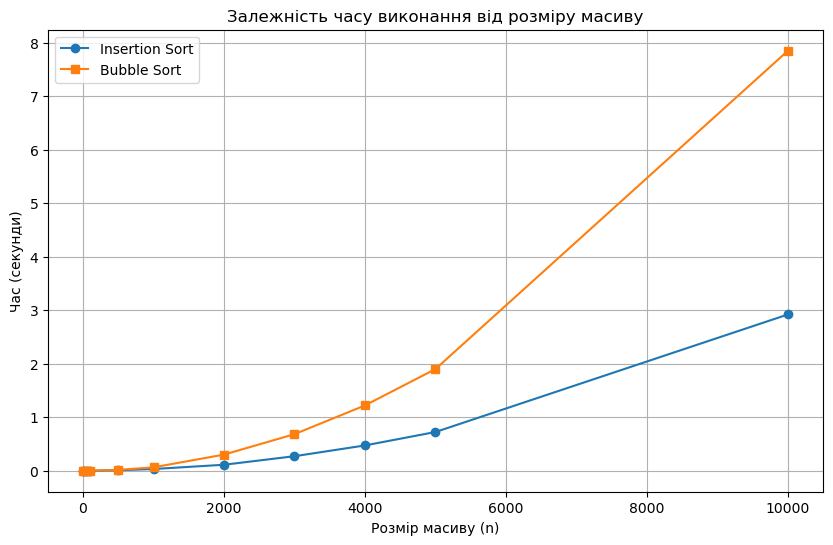

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(ns, times_insertion, label='Insertion Sort', marker='o')
plt.plot(ns, times_bubble, label='Bubble Sort', marker='s')

plt.title('Залежність часу виконання від розміру масиву')
plt.xlabel('Розмір масиву (n)')
plt.ylabel('Час (секунди)')
plt.legend()
plt.grid(True)
plt.show()

### Контрольні питання

1.  **Що таке $O$-нотація і чим вона відрізняється від $\Omega$-нотації?**
    $O$-нотація описує верхню межу складності алгоритму (найгірший сценарій), гарантуючи, що час виконання не перевищить певної величини. $\Omega$-нотація описує нижню межу (найкращий сценарій), показуючи, що алгоритм не може працювати швидше за цю межу.

2.  **Складність методу вставляння у найсприятливіших умовах:**
    Складність становить $O(n)$. Це відбувається, коли масив вже відсортований. У цьому випадку внутрішній цикл `while` не виконується жодного разу, відбувається лише один прохід по масиву зовнішнім циклом.

3.  **Визначення ефективного алгоритму:**
    Ефективний алгоритм — це алгоритм, який виконує поставлене завдання з оптимальним використанням обчислювальних ресурсів (часу процесора та пам'яті), зазвичай за поліноміальний час.

4.  **Головний параметр (розмір) завдання:**
    Це кількісна характеристика вхідних даних, від якої найбільше залежить час виконання алгоритму. У випадку сортування це кількість елементів масиву ($n$).

5.  **Асимптотична складність функції $F(N) = N^3 + 7N^2 - 14N$:**
    Складність: $O(N^3)$. При оцінці асимптотики враховується лише доданок з найбільшим степенем, оскільки при великих $N$ він зростає найшвидше. Коефіцієнти відкидаються.